# Hierarchical Clustering
### Bruno Morgado (301154898)

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import accuracy_score, silhouette_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import AgglomerativeClustering
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Fetch Olivetti dataset from Sklearn
dataset = fetch_olivetti_faces(shuffle=True, random_state=98)

In [4]:
# Storing features, target variable, and 2d features matrix as images
X = dataset.data
y = dataset.target
images = dataset.images
labels = dataset.target

In [5]:
images.shape

(400, 64, 64)

In [6]:
# Bundle X and y into a dataframe
pixel_columns = [f"pixel_{i}" for i in range(1, X.shape[1] + 1)]

df = pd.DataFrame(X, columns=pixel_columns)

df['target'] = y

In [7]:
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,pixel_4096,target
0,0.086777,0.099174,0.115702,0.128099,0.214876,0.359504,0.512397,0.603306,0.652893,0.702479,...,0.487603,0.479339,0.466942,0.450413,0.454545,0.454545,0.210744,0.318182,0.491736,37
1,0.260331,0.351240,0.438017,0.553719,0.648760,0.694215,0.747934,0.789256,0.809917,0.830579,...,0.541322,0.516529,0.520661,0.326446,0.074380,0.223140,0.256198,0.309917,0.289256,7
2,0.103306,0.219008,0.177686,0.219008,0.392562,0.574380,0.669421,0.681818,0.710744,0.731405,...,0.367769,0.433884,0.421488,0.425620,0.429752,0.429752,0.438017,0.475207,0.276859,3
3,0.669421,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380,13
4,0.425620,0.475207,0.458678,0.500000,0.524793,0.524793,0.541322,0.557851,0.586777,0.553719,...,0.491736,0.690083,0.661157,0.669421,0.524793,0.433884,0.491736,0.483471,0.483471,33


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4097 entries, pixel_1 to target
dtypes: float32(4096), int32(1)
memory usage: 6.3 MB


In [9]:
# Split dataset into train, validation, and test sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=98, stratify=y)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=98, stratify=y_temp)

print(f"Training set size: {len(y_train)}")
print(f"Validation set size: {len(y_valid)}")
print(f"Test set size: {len(y_test)}")

Training set size: 320
Validation set size: 40
Test set size: 40


In [10]:
# train the Logistic Regression Classifier
log_clf = LogisticRegression('l2', random_state=98)

In [11]:
# Get 5-fold cross validation scores
k = 5
scores = cross_val_score(log_clf, X_train, y_train, cv=k, scoring='accuracy')

print(f"Cross-validation scores (k={k}):", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores (k=5): [0.96875  0.953125 0.9375   0.921875 0.921875]
Average cross-validation score: 0.940625


In [12]:
# Train the Logistic Regression classifier
log_clf.fit(X_train, y_train)

LogisticRegression(random_state=98)

In [13]:
# Make predictions and print validation scores on the validation set
y_pred_valid = log_clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred_valid)
print(f"Validation accuracy: ", accuracy)

Validation accuracy:  1.0


In [14]:
# Make predictions on the test set
y_pred = log_clf.predict(X_test)

In [15]:
# Print the classification report
print('\t\tClassification Report - Logistic Regression\n\n', classification_report(y_test, y_pred))

		Classification Report - Logistic Regression

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00

In [16]:
desired_images = images[labels == 7]

In [17]:
def plot_images(images):

    n_images = len(images)
    rows = int(np.sqrt(n_images))
    cols = (n_images // rows) + int(n_images % rows != 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.5, rows * 1.5))
    
    # Plot all images
    for ax, img in zip(axes.ravel(), images):
        ax.imshow(img, cmap="gray")
        ax.axis("off")
    
    # Turn off any remaining axes
    for ax in axes.ravel()[n_images:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

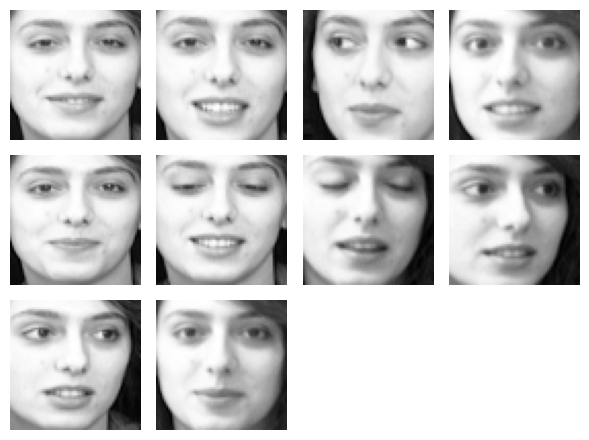

In [18]:
plot_images(desired_images)

In [19]:
n_clusters_range = range(2, 201)
def compute_scores(X, metric, linkage_method):
    scores = []
    for n_clusters in n_clusters_range:
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage_method)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels, metric=metric)
        scores.append(silhouette_avg)
    return scores

In [20]:
# Calculate silhouette scores for each metric
euclidean_scores = compute_scores(X, 'euclidean', 'ward')
minkowski_scores = compute_scores(X, 'minkowski', 'average')  # Using average linkage with Minkowski
cosine_scores = compute_scores(X, 'cosine', 'average')  # Using average linkage with Cosine

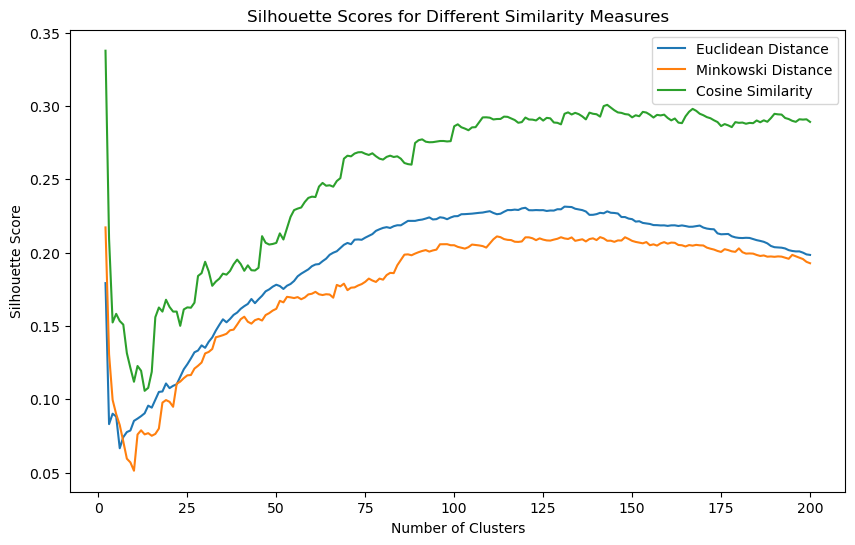

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, euclidean_scores, label='Euclidean Distance')
plt.plot(n_clusters_range, minkowski_scores, label='Minkowski Distance')
plt.plot(n_clusters_range, cosine_scores, label='Cosine Similarity')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.title('Silhouette Scores for Different Similarity Measures')
plt.show()

In [22]:
best_n_clusters_euclidean = n_clusters_range[euclidean_scores.index(max(euclidean_scores))]
best_n_clusters_euclidean

131

In [23]:
euclidean_scores[129]

0.23137215

In [24]:
best_n_clusters_minkowski = n_clusters_range[minkowski_scores.index(max(minkowski_scores[15:]))]
best_n_clusters_minkowski

112

In [25]:
euclidean_scores[159]

0.2185917

In [26]:
best_n_clusters_cosine = n_clusters_range[cosine_scores.index(max(cosine_scores[15:]))]
best_n_clusters_cosine

143

In [28]:
# Initialize a dictionary to store the reduced data
reduced_data = {}

# Metrics to perform dimensionality reduction
metrics = ['euclidean', 'minkowski', 'cosine']

for metric in metrics:
    # Here, 'ward' linkage only works for the 'euclidean' metric
    linkage = 'ward' if metric == 'euclidean' else 'average'
    
    if metric == 'euclidean':
        n_clusters = best_n_clusters_euclidean
    elif metric == 'minkowski':
        n_clusters = best_n_clusters_minkowski
    else:
        n_clusters = best_n_clusters_cosine
    
    # Perform AHC clustering
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
    labels = agg_cluster.fit_predict(X)
    
    # Compute centroids for each cluster
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    
    # Replace data points with their cluster centroid values
    reduced_X = centroids[labels]
    
    reduced_data[metric] = reduced_X

# The dictionary 'reduced_data' now has the compressed datasets for each metric
print(reduced_data['euclidean'].shape) 
print(reduced_data['minkowski'].shape)
print(reduced_data['cosine'].shape)

(400, 4096)
(400, 4096)
(400, 4096)


In [29]:
# Split Compressed Euclidean dataset into train, validation, and test sets with stratification
X_train_eu, X_temp_eu, y_train_eu, y_temp_eu = train_test_split(reduced_data['euclidean'], y, test_size=0.2, random_state=98, stratify=y)

X_valid_eu, X_test_eu, y_valid_eu, y_test_eu = train_test_split(X_temp_eu, y_temp_eu, test_size=0.5, random_state=98, stratify=y_temp_eu)

print(f"Training set size: {len(y_train_eu)}")
print(f"Validation set size: {len(y_valid_eu)}")
print(f"Test set size: {len(y_test_eu)}")

Training set size: 320
Validation set size: 40
Test set size: 40


In [30]:
# train the Logistic Regression Classifier
log_clf_eu = LogisticRegression('l2', random_state=98)

In [31]:
# Get 5-fold cross validation scores for the Euclidean compressed set
k = 5
scores = cross_val_score(log_clf_eu, X_train_eu, y_train_eu, cv=k, scoring='accuracy')

print(f"Cross-validation scores (k={k}):", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores (k=5): [0.96875  0.921875 0.9375   0.9375   0.90625 ]
Average cross-validation score: 0.934375


In [32]:
# Split Compressed Minkowski dataset into train, validation, and test sets with stratification
X_train_mi, X_temp_mi, y_train_mi, y_temp_mi = train_test_split(reduced_data['minkowski'], y, test_size=0.2, random_state=98, stratify=y)

X_valid_mi, X_test_mi, y_valid_mi, y_test_mi = train_test_split(X_temp_mi, y_temp_mi, test_size=0.5, random_state=98, stratify=y_temp_mi)

print(f"Training set size: {len(y_train_mi)}")
print(f"Validation set size: {len(y_valid_mi)}")
print(f"Test set size: {len(y_test_mi)}")

Training set size: 320
Validation set size: 40
Test set size: 40


In [33]:
# train the Logistic Regression Classifier
log_clf_mi = LogisticRegression('l2', random_state=98)

In [34]:
# Get 5-fold cross validation scores for the Minkowski compressed set
k = 5
scores = cross_val_score(log_clf_mi, X_train_mi, y_train_mi, cv=k, scoring='accuracy')

print(f"Cross-validation scores (k={k}):", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores (k=5): [0.84375  0.890625 0.859375 0.828125 0.859375]
Average cross-validation score: 0.85625


In [35]:
# Split Compressed Minkowski dataset into train, validation, and test sets with stratification
X_train_co, X_temp_co, y_train_co, y_temp_co = train_test_split(reduced_data['cosine'], y, test_size=0.2, random_state=98, stratify=y)

X_valid_co, X_test_co, y_valid_co, y_test_co = train_test_split(X_temp_co, y_temp_co, test_size=0.5, random_state=98, stratify=y_temp_co)

print(f"Training set size: {len(y_train_co)}")
print(f"Validation set size: {len(y_valid_co)}")
print(f"Test set size: {len(y_test_co)}")

Training set size: 320
Validation set size: 40
Test set size: 40


In [36]:
# train the Logistic Regression Classifier
log_clf_co = LogisticRegression('l2', random_state=98)

In [37]:
# Get 5-fold cross validation scores for the Cosine compressed set
k = 5
scores = cross_val_score(log_clf_co, X_train_co, y_train_co, cv=k, scoring='accuracy')

print(f"Cross-validation scores (k={k}):", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores (k=5): [0.890625 0.828125 0.875    0.859375 0.859375]
Average cross-validation score: 0.8625


# END